# All Models target value = ' Win ' 

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv("new_final_df.csv")
cols = [0]
df.drop(df.columns[cols],axis=1,inplace=True)
df.loc[df.Win == 0.5,'Win'] = 0
df.loc[df.WinSpread == 0.5,'WinSpread'] = 0
df

,home,net_points,net_yard,net_turn,weekly_rank,spread,Win,WinSpread
0,1,0,0,0,2,-5.5,1.0,1.0
1,0,0,0,0,6,5.5,0.0,0.0
2,1,0,0,0,17,-1.0,0.0,0.0
3,0,0,0,0,15,1.0,1.0,1.0
4,1,0,0,0,27,-3.0,1.0,1.0
...,...,...,...,...,...,...,...,...
4603,0,116,1268,-4,10,6.0,1.0,1.0
4604,1,112,-104,-15,7,-6.5,1.0,0.0
4605,0,-34,-325,0,13,6.5,0.0,1.0
4606,1,52,-302,-5,8,-3.0,0.0,0.0


# Model Using Logistic Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
X = df.drop(columns=['Win', 'WinSpread'],axis=1)
y = df['Win']
y = y.astype('int')

#Split to test and train 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [5]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print ("Training set accuracy:", '%.3f'%(score))
print ("Test set accuracy:", '%.3f'%(score2))

Training set accuracy: 0.663
Test set accuracy: 0.672


In [6]:
predictions = logreg.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 0 1 0 0 1 0 1 1 0]
First 10 Actual labels: [1, 0, 0, 1, 0, 0, 0, 1, 1, 1]


In [7]:
import sklearn.metrics as metric
r2 = metric.r2_score(y_test, predictions)
mse = metric.mean_squared_error(y_test, predictions)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: -0.3131046540322817
Mean Squared Error: 0.32827187274041936


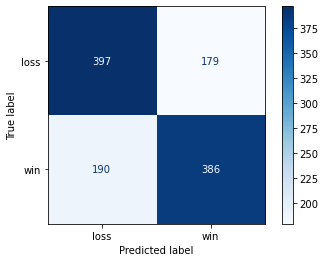

In [34]:
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, display_labels=["loss", "win"])

plt.show()

# Model Using Deep Nueral Network

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
from tensorflow.keras.utils import to_categorical


In [11]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(units=10, activation='relu', input_dim=6))
deep_model.add(Dense(units=8, activation='relu'))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=4, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [13]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [14]:
# deep_model.fit(
#     X_train_scaled,
#     y_train_categorical,
#     epochs=100,
#     shuffle=True,
#     verbose=2
# )

Train on 3225 samples
Epoch 1/100
3225/3225 - 2s - loss: 0.6558 - accuracy: 0.6068
Epoch 2/100
3225/3225 - 0s - loss: 0.6330 - accuracy: 0.6639
Epoch 3/100
3225/3225 - 0s - loss: 0.6201 - accuracy: 0.6738
Epoch 4/100
3225/3225 - 0s - loss: 0.6133 - accuracy: 0.6722
Epoch 5/100
3225/3225 - 0s - loss: 0.6102 - accuracy: 0.6707
Epoch 6/100
3225/3225 - 0s - loss: 0.6071 - accuracy: 0.6741
Epoch 7/100
3225/3225 - 0s - loss: 0.6048 - accuracy: 0.6738
Epoch 8/100
3225/3225 - 0s - loss: 0.6042 - accuracy: 0.6679
Epoch 9/100
3225/3225 - 0s - loss: 0.6020 - accuracy: 0.6713
Epoch 10/100
3225/3225 - 0s - loss: 0.6014 - accuracy: 0.6732
Epoch 11/100
3225/3225 - 0s - loss: 0.6004 - accuracy: 0.6716
Epoch 12/100
3225/3225 - 0s - loss: 0.5988 - accuracy: 0.6744
Epoch 13/100
3225/3225 - 0s - loss: 0.5987 - accuracy: 0.6753
Epoch 14/100
3225/3225 - 0s - loss: 0.5983 - accuracy: 0.6757
Epoch 15/100
3225/3225 - 0s - loss: 0.5973 - accuracy: 0.6750
Epoch 16/100
3225/3225 - 0s - loss: 0.5973 - accuracy: 0.

In [15]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1383/1 - 1s - loss: 0.5400 - accuracy: 0.6725
Deep Neural Network - Loss: 0.6010508212548447, Accuracy: 0.6724511981010437


# Model Using Decision Tree

In [44]:
target = df["Win"]
target_names = ["loss", "win"]

In [45]:
data = df.drop(columns=['Win', 'WinSpread'],axis=1)
feature_names = data.columns
data.head(50)

,home,net_points,net_yard,net_turn,weekly_rank,spread
0,1,0,0,0,2,-5.5
1,0,0,0,0,6,5.5
2,1,0,0,0,17,-1.0
3,0,0,0,0,15,1.0
4,1,0,0,0,27,-3.0
5,0,0,0,0,31,3.0
6,1,0,0,0,19,-3.0
7,0,0,0,0,20,3.0
8,1,0,0,0,21,3.0
9,0,0,0,0,9,-3.0


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [47]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6883680555555556

# Model Using Random Forest 

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, criterion='entropy')
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7005208333333334

In [49]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2855419994646104, 'spread'),
 (0.20935694375333036, 'net_yard'),
 (0.19346595037864367, 'net_points'),
 (0.1545549848784212, 'weekly_rank'),
 (0.13116094775745768, 'net_turn'),
 (0.025919173767536805, 'home')]

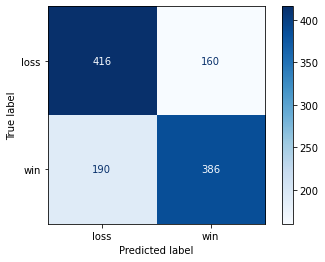

In [50]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels=["loss", "win"])

plt.show()

In [51]:
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions, target_names=["loss", "win"]))

              precision    recall  f1-score   support

        loss       0.69      0.72      0.70       576
         win       0.71      0.67      0.69       576

    accuracy                           0.70      1152
   macro avg       0.70      0.70      0.70      1152
weighted avg       0.70      0.70      0.70      1152



In [52]:
metric.roc_auc_score(y_test, predictions)

0.6961805555555556

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support vector machine linear classifier
model = SVC()

# Create the GridSearch estimator along with a parameter object containing the values to adjust
# 'C': regularization parameter: lower C means stronger regularization ("softer" margins)
# 'rbf': "Radial Basis Function" kernel is a Gaussian kernel (for non-linear boundaries)
param_grid = {
    'n_estimators': [50,100,150,200,250,300,350,400,450],
    'criterion': ['gini','entropy']
}
# Note: verbose doesn't work in parallel
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=True, n_jobs=-1)

# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   49.0s finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450]},
             verbose=True)

In [57]:
print(grid.best_params_)

{'criterion': 'entropy', 'n_estimators': 400}
